In [1]:
import random
import os
import sys
import time
import meshplot as mp
import import_ipynb
import igl
import matplotlib.pyplot as plt


import partitioning
import spectral_decomposition
import distortion
import attacks

importing Jupyter notebook from partitioning.ipynb
importing Jupyter notebook from spectral_decomposition.ipynb
importing Jupyter notebook from embedding.ipynb
importing Jupyter notebook from retrieval.ipynb
importing Jupyter notebook from distortion.ipynb
importing Jupyter notebook from attacks.ipynb


In [2]:
def embed_and_extract(patches = 60,strength = 100,data = [0, 1]*32):
    embed(patches,strength)
    errors = extract(patches,strength)
    return errors
  

In [3]:
def embed(patches = 60,strength = 100,data = [0, 1]*32):

    original_filename = "source_models/venus.obj"
    watermarked_filename = "watermarked_models/venus_strength"+str(strength)+ "_patches" + str(patches) + ".obj"

    # Insertion of the watermark
    embed_start = time.time()
    capacity = spectral_decomposition.insert(original_filename, watermarked_filename, data, 123456, strength, patches)
    embed_end = time.time()
    
    print(capacity," bits inserted")
    print(" ")
    print("Time to embed watermark: ", embed_end - embed_start)
    print(" ")
    print(" ")
    

In [4]:
def extract(patches = 60,strength = 100,data = [0, 1]*32):
    
    original_filename = "source_models/venus.obj"
    watermarked_filename = "watermarked_models/venus_strength"+str(strength)+ "_patches" + str(patches) + ".obj"
    
     # Extraction of the watermark
    extract_start = time.time()
    retrieved = spectral_decomposition.extract(watermarked_filename, 123456, 64, strength, patches,original_filename)
    extract_end = time.time()
    
    print("Time taken to embed watermark: ", extract_end - extract_start)
    print(" ")
    
    # Compute the number of errors
    errors = 0
    for i in range(len(data)):
        if data[i] != retrieved[i]:
            errors +=1
            
    original_mesh = igl.read_triangle_mesh(original_filename)
    watermarked_mesh = igl.read_triangle_mesh(watermarked_filename)

    rms = distortion.rms_error(original_mesh, watermarked_mesh)
    print("RMS Error Computed: ",rms)
    print(" ")
    
    hausdorff = distortion.hausdorff_distance(original_mesh, watermarked_mesh)
    print("Hausdorff Distance Computed: ", hausdorff)
    print(" ")
    
    smoothness = distortion.local_smoothness(original_mesh, watermarked_mesh)
    print("Local Smoothness Computed ", smoothness)
    print(" ")
    
    print("number of errors: ", errors)
    print(" ")
    
    print("Original Mesh")
    mp.plot(original_mesh[0],original_mesh[1])
    print(" ")
    
    print("Watermarked Mesh")
    mp.plot(watermarked_mesh[0],watermarked_mesh[1])
    
    return errors

In [5]:
def noise_attack():
    
    data = [0, 1]*32
    
    patches = 20
    strength = 5
    amplitude = 0.001
    
    in_name = "source_models/bunny.ply"
    filename = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + ".ply"
    original_mesh = igl.read_triangle_mesh(in_name)

    watermarked_mesh = igl.read_triangle_mesh(filename)
    watermarkedVertices = watermarked_mesh[0]
    watermarkedFaces = watermarked_mesh[1]
    
    file_noisy = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + "_amplitude" + str(amplitude) + ".ply"
    # Add random noise to the model then save it
    noise_mesh = attacks.noise(watermarked_mesh, amplitude)
    mp.plot(noise_mesh[0],noise_mesh[1])
    igl.write_triangle_mesh(file_noisy,noise_mesh[0],noise_mesh[1])
    # Extraction of the watermark
    retrieved = spectral_decomposition.extract(file_noisy, 123456, 64, strength, patches,in_name)
    # Compute the number of errors
    n_errors = len([x for x, y in zip(data, retrieved) if x != y])
    # Write the results to a file
    print("Number of errors: ",n_errors)
        

In [6]:
def smooth_attack():
    
    data = [0, 1]*32
    
    patches = 60
    strength = 100
    iterations = 1

    in_name = "source_models/bunny.ply"
    filename = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + ".ply"
    original_mesh = igl.read_triangle_mesh(in_name)

    watermarked_mesh = igl.read_triangle_mesh(filename)
    watermarkedVertices = watermarked_mesh[0]
    watermarkedFaces = watermarked_mesh[1]
       
    file_smoothed = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + "_iterations" + str(iterations) + ".ply"
    # Smooth the model then save it

    new_mesh = attacks.smoothing(watermarked_mesh, iterations)
    mp.plot(new_mesh[0],new_mesh[1])
    igl.write_triangle_mesh(file_smoothed, new_mesh[0], new_mesh[1])
    # Extraction of the watermark
    retrieved = spectral_decomposition.extract(file_smoothed, 123456, 64, strength, patches,in_name)
    # Compute the number of errors
    n_errors = len([x for x, y in zip(data, retrieved) if x != y])
    # Write the results to a file
    print("Number of errors: ",n_errors)
    

[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036000000000000004, 0.04]
Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
Only %s bits inserted, the bit error rate when retriving data might be significant 0
########## Embedding finished ##########
0  bits inserted
 
Time to embed watermark:  126.4379210472107
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  72.02703428268433
 
RMS Error Computed:  2.314090284499571e-11
 
Hausdorff Distance Computed:  1.002252561459429e-12
 
Local Smoothness Computed  2.0666022297983057e-13
 
number of errors:  32
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
105  bits inserted
 
Time to embed watermark:  141.30942583084106
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  79.73451733589172
 
RMS Error Computed:  0.4434572654922287
 
Hausdorff Distance Computed:  0.04399027899436003
 
Local Smoothness Computed  0.004313536220408611
 
number of errors:  8
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
192  bits inserted
 
Time to embed watermark:  144.2216191291809
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  85.61912631988525
 
RMS Error Computed:  0.7201792883770197
 
Hausdorff Distance Computed:  0.05572846491701
 
Local Smoothness Computed  0.005302580273782099
 
number of errors:  5
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
278  bits inserted
 
Time to embed watermark:  141.72656178474426
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  79.26537799835205
 
RMS Error Computed:  0.9423614832537238
 
Hausdorff Distance Computed:  0.09781634179829002
 
Local Smoothness Computed  0.0071918545105768995
 
number of errors:  1
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
363  bits inserted
 
Time to embed watermark:  125.72405624389648
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  77.87081003189087
 
RMS Error Computed:  1.10270487793864
 
Hausdorff Distance Computed:  0.09781634179829002
 
Local Smoothness Computed  0.012543818781754387
 
number of errors:  0
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
450  bits inserted
 
Time to embed watermark:  146.29020857810974
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  85.30913209915161
 
RMS Error Computed:  1.2727115016030934
 
Hausdorff Distance Computed:  0.09781634179829002
 
Local Smoothness Computed  0.014761924189360565
 
number of errors:  0
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
538  bits inserted
 
Time to embed watermark:  143.74581789970398
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  86.60131168365479
 
RMS Error Computed:  1.3991024355880781
 
Hausdorff Distance Computed:  0.09781634179829002
 
Local Smoothness Computed  0.02134022364394519
 
number of errors:  1
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
622  bits inserted
 
Time to embed watermark:  147.71374654769897
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  85.89334845542908
 
RMS Error Computed:  1.6412644049009282
 
Hausdorff Distance Computed:  0.10688434320816262
 
Local Smoothness Computed  0.02637344800383511
 
number of errors:  0
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0042605…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
710  bits inserted
 
Time to embed watermark:  131.66473937034607
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0066258…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  73.19930028915405
 
RMS Error Computed:  1.9731923719772284
 
Hausdorff Distance Computed:  0.13363750840812005
 
Local Smoothness Computed  0.028357022160490464
 
number of errors:  0
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0066258…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
800  bits inserted
 
Time to embed watermark:  130.12835144996643
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0066258…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  73.51073670387268
 
RMS Error Computed:  2.284942106872984
 
Hausdorff Distance Computed:  0.13363750840812005
 
Local Smoothness Computed  0.03740113524295133
 
number of errors:  0
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0066258…

Partitioning mesh...
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

Step 1: Mesh patched
Inserting data in  40  submeshes
Data inserted
########## Embedding finished ##########
881  bits inserted
 
Time to embed watermark:  128.69650077819824
 
 
########## Retrieval started ##########
19847
43357


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0066258…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  75.77538800239563
 
RMS Error Computed:  2.4992311422390467
 
Hausdorff Distance Computed:  0.13363750840812005
 
Local Smoothness Computed  0.038280945288855624
 
number of errors:  0
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0062913…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0066258…

[32, 8, 5, 1, 0, 0, 1, 0, 0, 0, 0]


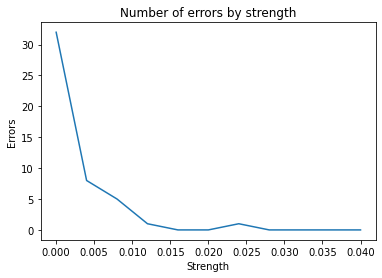

In [7]:
if __name__ == '__main__':
    errors = []
    mesh = igl.read_triangle_mesh("source_models/venus.obj")
    num_submeshes = round(len(mesh[0])/500)
    strengths = [x * 0.004 for x in range(0, 11)]
    print(strengths)

    for i in strengths:
        errors.append(embed_and_extract(num_submeshes,i))

    print(errors)
    x = strengths        
    y = errors
    plt.title("Number of errors by strength") 
    plt.xlabel("Strength") 
    plt.ylabel("Errors") 
    plt.plot(x,y)
    plt.show()
